## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
##Code Here
##設定超參數

lr = 0.1
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUMS = [0.95, 0.5,0.1]


In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for momentum in MOMENTUMS:
    for nesterov in [True, False]:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print("Experiment with momentum = %.6f, nesterov=%s" % (momentum, nesterov))
        model = build_mlp(input_shape=x_train.shape[1:])
        model.summary()
        optimizer = keras.optimizers.SGD(lr=lr, nesterov=nesterov, momentum=momentum)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]

        exp_name_tag = "exp-momentum-%s-nesterov-%s" %(str(momentum), str(nesterov))
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}

W0715 19:39:19.221909   524 deprecation_wrapper.py:119] From C:\Users\yulan\Anaconda3\envs\keras35\lib\site-packages\keras\backend\tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0715 19:39:19.225902   524 deprecation_wrapper.py:119] From C:\Users\yulan\Anaconda3\envs\keras35\lib\site-packages\keras\backend\tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0715 19:39:19.281909   524 deprecation_wrapper.py:119] From C:\Users\yulan\Anaconda3\envs\keras35\lib\site-packages\keras\backend\tensorflow_backend.py:102: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0715 19:39:19.291906   524 deprecation_wrapper.py:119] From C:\Users\yulan\Anaconda3\envs\keras35\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v

Experiment with momentum = 0.950000, nesterov=True
_________________________________________________________________

W0715 19:39:19.519905   524 deprecation_wrapper.py:119] From C:\Users\yulan\Anaconda3\envs\keras35\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.




Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


W0715 19:39:19.975070   524 deprecation.py:323] From C:\Users\yulan\Anaconda3\envs\keras35\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 16s 321us/step - loss: 2.0731 - acc: 0.2331 - val_loss: 2.8297 - val_acc: 0.1730
Epoch 2/50
50000/50000 [==============================] - 14s 271us/step - loss: 1.8861 - acc: 0.3044 - val_loss: 1.8772 - val_acc: 0.3152
Epoch 3/50
50000/50000 [==============================] - 19s 373us/step - loss: 1.8124 - acc: 0.3371 - val_loss: 1.8449 - val_acc: 0.3083
Epoch 4/50
50000/50000 [==============================] - 14s 277us/step - loss: 1.7585 - acc: 0.3668 - val_loss: 1.8047 - val_acc: 0.3525
Epoch 5/50
50000/50000 [==============================] - 16s 327us/step - loss: 1.7277 - acc: 0.3765 - val_loss: 1.8539 - val_acc: 0.3457
Epoch 6/50
50000/50000 [==============================] - 17s 344us/step - loss: 1.7107 - acc: 0.3911 - val_loss: 1.7005 - val_acc: 0.4021
Epoch 7/50
50000/50000 [==============================] - 16s 326us/step - loss: 1.6845 - acc: 0.3972 - val_loss: 1.

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 10s 209us/step - loss: 2.0707 - acc: 0.2321 - val_loss: 1.9251 - val_acc: 0.2739
Epoch 2/50
50000/50000 [==============================] - 10s 191us/step - loss: 1.9306 - acc: 0.2838 - val_loss: 1.8928 - val_acc: 0.3030
Epoch 3/50
50000/50000 [==============================] - 9s 187us/step - loss: 1.9484 - acc: 0.2671 - val_loss: 1.9146 - val_acc: 0.2701
Epoch 4/50
50000/50000 [==============================] - 10s 202us/step - loss: 1.9231 - acc: 0.2723 - val_loss: 1.9659 - val_acc: 0.2383 3s - loss: - ETA: 2
Epoch 5/50
50000/50000 [==============================] - 9s 190us/step - loss: 1.9050 - acc: 0.2833 - val_loss: 1.8975 - val_acc: 0.2883
Epoch 6/50
50000/50000 [==============================] - 10s 190us/step - loss: 1.8962 - acc: 0.2912 - val_loss: 1.8715 - val_acc: 0.2913
Epoch 7/50
50000/50000 [==============================] - 11s 215us/step - loss: 1.9027 - acc: 0.2

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 9s 190us/step - loss: 2.0856 - acc: 0.2363 - val_loss: 1.8723 - val_acc: 0.3183
Epoch 2/50
50000/50000 [==============================] - 8s 152us/step - loss: 1.8406 - acc: 0.3389 - val_loss: 1.8902 - val_acc: 0.3158
Epoch 3/50
50000/50000 [==============================] - 8s 152us/step - loss: 1.7531 - acc: 0.3695 - val_loss: 1.7425 - val_acc: 0.3762
Epoch 4/50
50000/50000 [==============================] - 9s 173us/step - loss: 1.6697 - acc: 0.4023 - val_loss: 1.6950 - val_acc: 0.3962
Epoch 5/50
50000/50000 [==============================] - 9s 185us/step - loss: 1.6171 - acc: 0.4229 - val_loss: 1.7277 - val_acc: 0.3934
Epoch 6/50
50000/50000 [==============================] - 10s 196us/step - loss: 1.5781 - acc: 0.4364 - val_loss: 1.6365 - val_acc: 0.4176
Epoch 7/50
50000/50000 [==============================] - 11s 219us/step - loss: 1.5379 - acc: 0.4526 - val_loss: 1.6383 

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 9s 172us/step - loss: 2.0038 - acc: 0.2703 - val_loss: 1.8360 - val_acc: 0.3309
Epoch 2/50
50000/50000 [==============================] - 8s 156us/step - loss: 1.7760 - acc: 0.3588 - val_loss: 1.7021 - val_acc: 0.3869
Epoch 3/50
50000/50000 [==============================] - 7s 149us/step - loss: 1.6915 - acc: 0.3934 - val_loss: 1.7010 - val_acc: 0.3730
Epoch 4/50
50000/50000 [==============================] - 7s 144us/step - loss: 1.6102 - acc: 0.4237 - val_loss: 1.6346 - val_acc: 0.4090
Epoch 5/50
50000/50000 [==============================] - 7s 146us/step - loss: 1.5772 - acc: 0.4369 - val_loss: 1.7555 - val_acc: 0.3910
Epoch 6/50
50000/50000 [==============================] - 8s 156us/step - loss: 1.5117 - acc: 0.4614 - val_loss: 1.7039 - val_acc: 0.3964
Epoch 7/50
50000/50000 [==============================] - 7s 146us/step - loss: 1.4802 - acc: 0.4724 - val_loss: 1.7660 - 

50000/50000 [==============================] - 8s 153us/step - loss: 2.0504 - acc: 0.2542 - val_loss: 2.0124 - val_acc: 0.2932
Epoch 2/50
50000/50000 [==============================] - 7s 149us/step - loss: 1.8306 - acc: 0.3417 - val_loss: 1.9981 - val_acc: 0.2695
Epoch 3/50
50000/50000 [==============================] - 7s 139us/step - loss: 1.7464 - acc: 0.3720 - val_loss: 1.6451 - val_acc: 0.4110
Epoch 4/50
50000/50000 [==============================] - 7s 142us/step - loss: 1.6716 - acc: 0.4052 - val_loss: 1.7628 - val_acc: 0.3663
Epoch 5/50
50000/50000 [==============================] - 7s 143us/step - loss: 1.6230 - acc: 0.4206 - val_loss: 1.6684 - val_acc: 0.3995
Epoch 6/50
50000/50000 [==============================] - 7s 147us/step - loss: 1.5815 - acc: 0.4372 - val_loss: 1.6029 - val_acc: 0.4110
Epoch 7/50
50000/50000 [==============================] - 7s 146us/step - loss: 1.5525 - acc: 0.4457 - val_loss: 1.6670 - val_acc: 0.4127
Epoch 8/50
50000/50000 [=====================

50000/50000 [==============================] - 17s 333us/step - loss: 1.8241 - acc: 0.3454 - val_loss: 1.8162 - val_acc: 0.3453 ETA: 2s - loss: 1.8320 - a - ETA: 2
Epoch 3/50
50000/50000 [==============================] - 17s 336us/step - loss: 1.7285 - acc: 0.3789 - val_loss: 1.8162 - val_acc: 0.3399
Epoch 4/50
50000/50000 [==============================] - 21s 410us/step - loss: 1.6590 - acc: 0.4084 - val_loss: 1.6914 - val_acc: 0.3845
Epoch 5/50
50000/50000 [==============================] - 18s 357us/step - loss: 1.6115 - acc: 0.4243 - val_loss: 1.6276 - val_acc: 0.4118
Epoch 6/50
50000/50000 [==============================] - 22s 439us/step - loss: 1.5833 - acc: 0.4360 - val_loss: 1.6519 - val_acc: 0.4145
Epoch 7/50
50000/50000 [==============================] - 19s 383us/step - loss: 1.5372 - acc: 0.4512 - val_loss: 1.5510 - val_acc: 0.4371
Epoch 8/50
50000/50000 [==============================] - 15s 309us/step - loss: 1.4999 - acc: 0.4668 - val_loss: 1.5593 - val_acc: 0.4421
Ep

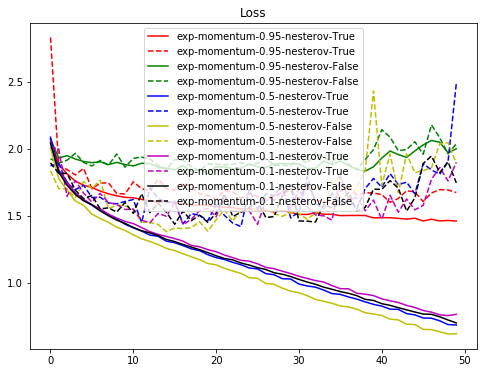

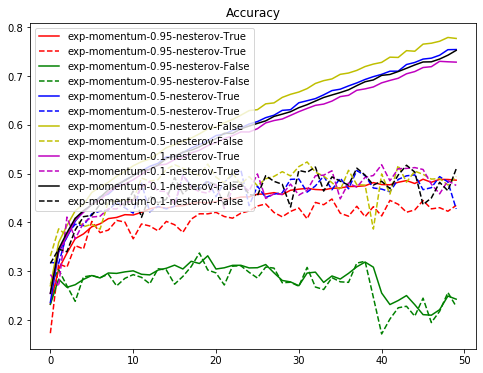

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()